<a href="https://colab.research.google.com/github/Kiran-Pokhrel-91/DeepLearning/blob/main/Car_Price_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Drive and File Config

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import os
os.chdir(r"/content/drive/MyDrive/Deep Learning")
print(os.getcwd())

/content/drive/MyDrive/Deep Learning


# Importing dependencies

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Normalization,InputLayer, Dense , Dropout
from tensorflow.keras.losses import MeanSquaredError,MeanAbsoluteError,huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

from tqdm.keras import TqdmCallback


# Analyzing The Data

In [44]:
data = pd.read_csv("./Car Price Prediction/train.csv")
data

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [45]:
print(data.info())
print(f"Shape: {data.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB
None
Shape: (1000, 12)


Good, to see there is no null values.Which is good for ML


📊 Column: years
Number of outliers: 0
Outlier indices: []
Outlier values:
[]

📊 Column: km
Number of outliers: 0
Outlier indices: []
Outlier values:
[]

📊 Column: rating
Number of outliers: 0
Outlier indices: []
Outlier values:
[]

📊 Column: condition
Number of outliers: 0
Outlier indices: []
Outlier values:
[]

📊 Column: economy
Number of outliers: 0
Outlier indices: []
Outlier values:
[]

📊 Column: top speed
Number of outliers: 0
Outlier indices: []
Outlier values:
[]

📊 Column: hp
Number of outliers: 0
Outlier indices: []
Outlier values:
[]

📊 Column: torque
Number of outliers: 0
Outlier indices: []
Outlier values:
[]

📊 Column: current price
Number of outliers: 0
Outlier indices: []
Outlier values:
[]


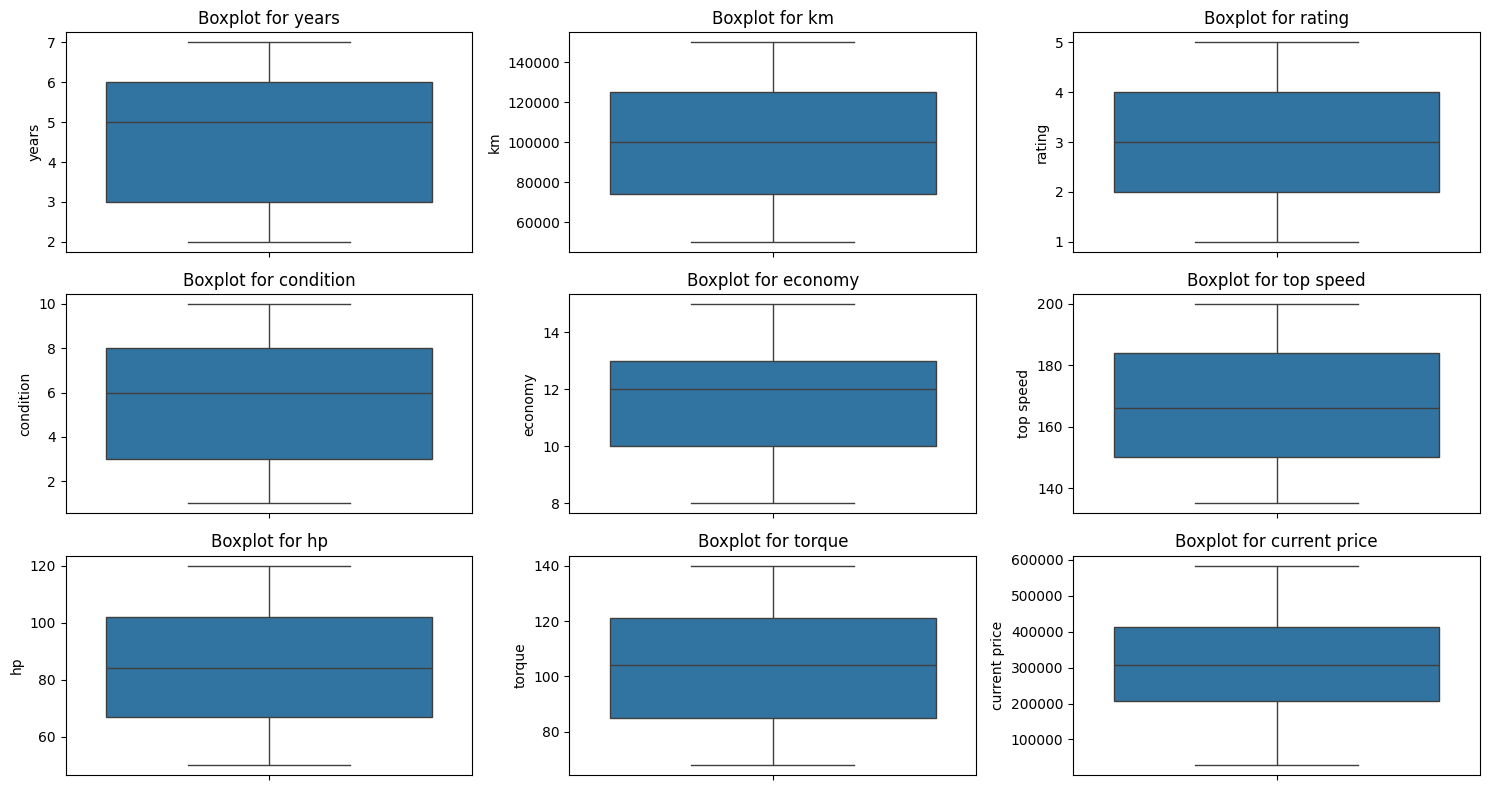

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def detect_and_plot_outliers(df, columns=None, plot=True, figsize=(12, 4), outlier_details=True):
    """
    Detect outliers and optionally plot boxplots.

    Parameters:
    - df (pd.DataFrame): Input DataFrame
    - columns (list or None): Columns to check; if None, all numeric columns are used
    - plot (bool): Whether to show boxplots
    - figsize (tuple): Size of the figure for boxplots
    - outlier_details (bool): Whether to print detailed outlier info or not

    Returns:
    - outlier_info (dict): Info about outliers per column
    """
    if columns is None:
        columns = df.select_dtypes(include='number').columns

    outlier_info = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        is_outlier = (df[col] < lower) | (df[col] > upper)

        outlier_info[col] = {
            'outliers': df[col][is_outlier],
            'count': is_outlier.sum(),
            'indices': df[col][is_outlier].index.tolist()
        }

        if outlier_details:
            print(f"\n📊 Column: {col}")
            print(f"Number of outliers: {outlier_info[col]['count']}")
            print(f"Outlier indices: {outlier_info[col]['indices']}")
            print(f"Outlier values:\n{outlier_info[col]['outliers'].values}")

    if plot:
        plt.figure(figsize=figsize)
        n_cols = int(np.ceil(np.sqrt(len(columns))))
        n_rows = int(np.ceil(len(columns) / n_cols))
        for i, col in enumerate(columns, 1):
            plt.subplot(n_rows, n_cols, i)
            sns.boxplot(y=df[col])
            plt.title(f"Boxplot for {col}")
        plt.tight_layout()
        plt.show()

    return outlier_info
outliers = detect_and_plot_outliers(df=plt_data,figsize=(15,8))

It's good to see there is no outliers

# Linear Regression Modelling

In [48]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data,tf.float32)
tensor_data = tf.random.shuffle(tensor_data)
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[3.720000e+02, 6.800350e+05, 8.570760e+05, ..., 9.900000e+01,
        9.700000e+01, 4.000275e+05],
       [7.530000e+02, 5.714670e+05, 7.657750e+05, ..., 9.700000e+01,
        8.700000e+01, 3.407770e+05],
       [5.480000e+02, 5.547780e+05, 8.730330e+05, ..., 7.300000e+01,
        1.250000e+02, 4.006065e+05],
       ...,
       [8.650000e+02, 6.166140e+05, 8.284220e+05, ..., 7.900000e+01,
        9.500000e+01, 1.407965e+05],
       [1.860000e+02, 6.079560e+05, 8.242960e+05, ..., 7.000000e+01,
        1.060000e+02, 1.724620e+05],
       [8.460000e+02, 5.994010e+05, 8.200270e+05, ..., 9.200000e+01,
        1.260000e+02, 2.435655e+05]], dtype=float32)>

converted the pandas dataframe into tenserflow tensors

In [49]:
X = tensor_data[:,3:-1]
y = tensor_data[:,-1]
y=tf.expand_dims(y,axis=-1) # to match dimention of X and y
X.shape,y.shape

(TensorShape([1000, 8]), TensorShape([1000, 1]))

In [50]:
Train_Ratio = 0.8
Val_Ratio = 0.1
Test_Rotio = 0.1
Dataset_Size = len(X)

In [51]:
train_end = int(Dataset_Size * Train_Ratio)
val_end = train_end + int(Dataset_Size * Val_Ratio)

X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

(TensorShape([800, 8]),
 TensorShape([800, 1]),
 TensorShape([100, 8]),
 TensorShape([100, 1]),
 TensorShape([100, 8]),
 TensorShape([100, 1]))

In [52]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
train_dataset = train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val,y_val))
val_dataset = val_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_val,y_val))
test_dataset = test_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [53]:
normalizer = Normalization()
normalizer.adapt(X_train)

Normalizing data to ensure that each feature contributes equally to the learning process, preventing features with larger scales from dominating the model's decision-making process.

In [54]:
model = Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,538 (45.07 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 17 (72.00 B)

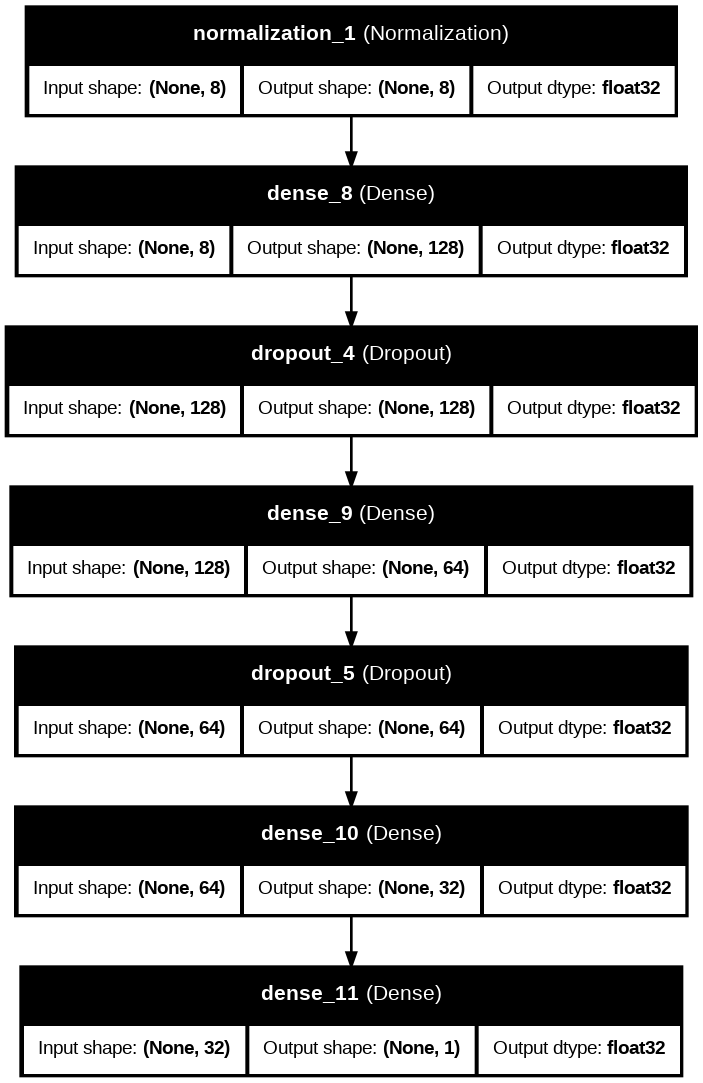

In [55]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,         # show output tensor shapes
    show_dtype=True,          # show data types of tensors (e.g. float32)
    show_layer_names=True,    # show the layer names
    expand_nested=True,       # expand nested models if any
    dpi=96                   # image resolution, increase for sharper images
)


# Traning and Optimization

In [56]:
optimizer = Adam(learning_rate=0.1)

In [57]:
model.compile(optimizer=optimizer,
              loss=MeanSquaredError(),
              metrics=[RootMeanSquaredError()])

Since,there is `no any outliers` and the model is `regression`. Thus, it is best to use `MeanSquareError()`  as a loss function as it is highly sensitive to outliers::

In [58]:
history = model.fit(
    train_dataset,
    epochs=120,
    validation_data=val_dataset,
    verbose=0,
    callbacks=[TqdmCallback(verbose=1)]
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

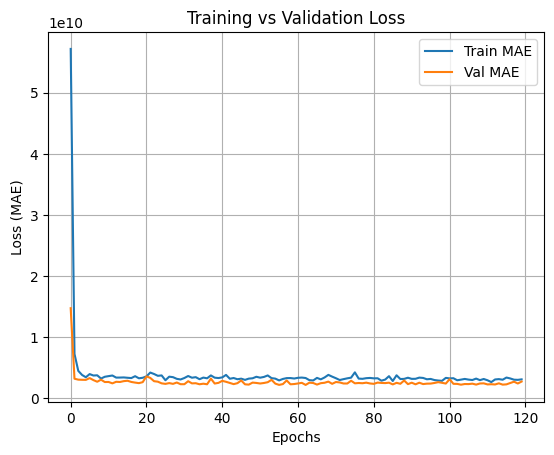

In [59]:
plt.plot(history.history['loss'], label='Train MAE')
plt.plot(history.history['val_loss'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.title("Training vs Validation Loss")
plt.grid(True)
plt.show()

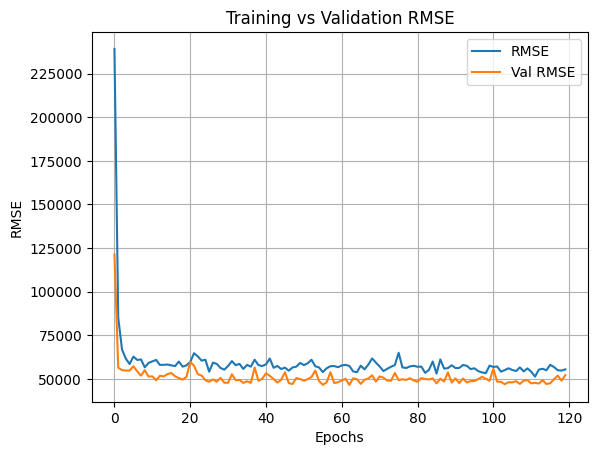

In [60]:
plt.plot(history.history['root_mean_squared_error'], label='RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Val RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.title("Training vs Validation RMSE")
plt.grid(True)
plt.show()

In [61]:
result = model.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2787609344.0000 - root_mean_squared_error: 52794.6289


In [62]:
y_true = list(y_test[:,0].numpy())

In [63]:
y_pred = list(model.predict(X_test)[:,0])

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


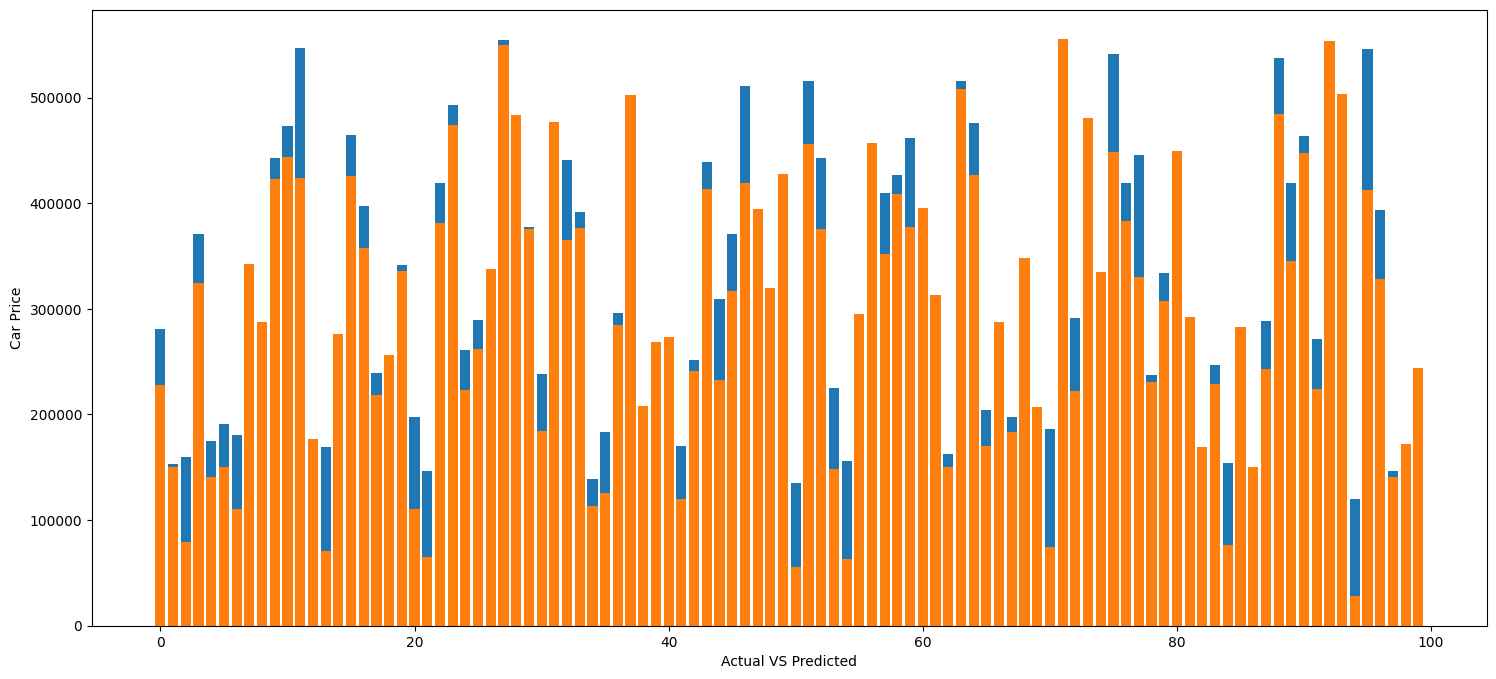

In [64]:
ind = np.arange(100)
plt.figure(figsize=(18,8))
width = 0.1
plt.bar(ind,y_pred,label="Predicted Car Price")
plt.bar(ind,y_true,label="Actual Car Price")
plt.xlabel("Actual VS Predicted")
plt.ylabel("Car Price")
plt.show()

In [65]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 87.46%
